In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

data = pd.read_excel("data_all_train.xlsx")
data = shuffle(data)
data.head()

,WL,B,G,R,Abs
12467,664,67.815150,116.765653,200.981703,0.0310
19474,474,42.100089,1.193952,120.158206,1.0564
4235,475,24.840306,69.228261,150.515192,0.4934
26582,584,39.341275,27.474191,82.383055,0.8914
27906,463,39.073761,30.118614,79.152587,1.4886


In [2]:
data.isnull().sum(axis=0)

WL     0
B      0
G      0
R      0
Abs    0
dtype: int64

In [3]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35288 entries, 12467 to 2032
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WL      35288 non-null  int64  
 1   B       35288 non-null  float64
 2   G       35288 non-null  float64
 3   R       35288 non-null  float64
 4   Abs     35288 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 1.6 MB
None
(35288, 5)


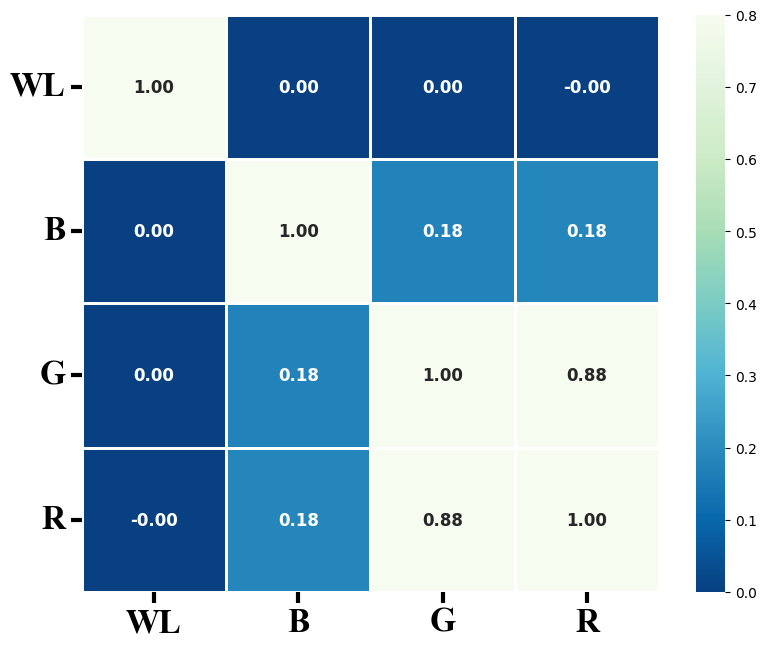

In [4]:
data_01 = data.iloc[:,0:-1]   
corr_mat = data_01.corr()
f, ax = plt.subplots(figsize=(9.5, 7.5))

sns.heatmap(corr_mat, vmax=.8, square=True, cmap="GnBu_r",\
            annot=True, annot_kws={'size': 12,'weight':'bold',}, fmt='.2f',linecolor= 'white', linewidths = 1)

plt.xticks(rotation=360, fontproperties = 'Times New Roman', size = 24, weight='black')
plt.yticks(rotation=360, fontproperties = 'Times New Roman', size = 24, weight='black')

plt.tick_params(width=3,length=8)

plt.savefig("correlation.png", dpi=600)
plt.show()

In [5]:
X_train = data.drop(["Abs"],axis=1)
y_train = data["Abs"]
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [6]:
# Training set
X_train = data.drop(["Abs"],axis=1)
y_train = data["Abs"]

# Testing set
data = pd.read_excel("data_all_test.xlsx")
X_test = data.drop(["Abs"],axis=1)
y_test = data["Abs"]

In [7]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

KNNR = KNeighborsRegressor(5)
KNNR.fit (X_train, y_train)

KNNR_pred_train = KNNR.predict(X_train)
KNNR_pred_test = KNNR.predict(X_test)

pearson_train = np.corrcoef(y_train, KNNR_pred_train)
pearson_test = np.corrcoef(y_test, KNNR_pred_test)

MAPE_train = mean_absolute_percentage_error(y_train, KNNR_pred_train)
RMSE_train = np.sqrt(mean_squared_error(y_train, KNNR_pred_train))
MAE_train = mean_absolute_error(y_train, KNNR_pred_train)


MAPE_test = mean_absolute_percentage_error(y_test, KNNR_pred_test)
RMSE_test = np.sqrt(mean_squared_error(y_test, KNNR_pred_test))
MAE_test = mean_absolute_error(y_test, KNNR_pred_test)

print("Pearson Coeffient train:",pearson_train)
print("Pearson Coeffient test:",pearson_test)
print("MAPE_train:", MAPE_train)
print("RMSE_train:", RMSE_train)
print("MAE_train:", MAE_train)
print("MAPE_test:", MAPE_test)
print("RMSE_test:", RMSE_test)
print("MAE_test:", MAE_test)

Pearson Coeffient train: [[1.         0.99997352]
 [0.99997352 1.        ]]
Pearson Coeffient test: [[1.       0.952497]
 [0.952497 1.      ]]
MAPE_train: 0.004939866589923722
RMSE_train: 0.003658508584119639
MAE_train: 0.0013487712536839722
MAPE_test: 0.10329862308375244
RMSE_test: 0.14484903491007703
MAE_test: 0.06877789415350513


In [8]:
# Random Forest
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

RFR = ensemble.RandomForestRegressor(n_estimators=60) #, random_state=1234

RFR.fit(X_train, y_train)

RFR_pred_train = RFR.predict(X_train)
RFR_pred_test = RFR.predict(X_test)

pearson_train = np.corrcoef(y_train, RFR_pred_train)
pearson_test = np.corrcoef(y_test, RFR_pred_test)

MAPE_train = mean_absolute_percentage_error(y_train, RFR_pred_train)
RMSE_train = np.sqrt(mean_squared_error(y_train, RFR_pred_train))
MAE_train = mean_absolute_error(y_train, RFR_pred_train)

MAPE_test = mean_absolute_percentage_error(y_test, RFR_pred_test)
RMSE_test = np.sqrt(mean_squared_error(y_test, RFR_pred_test))
MAE_test = mean_absolute_error(y_test, RFR_pred_test)

print("Pearson Coeffient train:",pearson_train)
print("Pearson Coeffient test:",pearson_test)
print("MAPE_train:", MAPE_train)
print("RMSE_train:", RMSE_train)
print("MAE_train:", MAE_train)
print("MAPE_test:", MAPE_test)
print("RMSE_test:", RMSE_test)
print("MAE_test:", MAE_test)

Pearson Coeffient train: [[1.         0.99999211]
 [0.99999211 1.        ]]
Pearson Coeffient test: [[1.         0.96896639]
 [0.96896639 1.        ]]
MAPE_train: 0.003328801325166008
RMSE_train: 0.001998777543783185
MAE_train: 0.001166515907201683
MAPE_test: 0.1117808987461523
RMSE_test: 0.1310573738079136
MAE_test: 0.05540560127459128


In [9]:
# ExtraTree
from sklearn import ensemble
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

ExtraTree_R = ensemble.ExtraTreesRegressor(n_estimators=15)

ExtraTree_R.fit(X_train, y_train)

ExtraTree_R_pred_train = ExtraTree_R.predict(X_train)
ExtraTree_R_pred_test = ExtraTree_R.predict(X_test)

pearson_train = np.corrcoef(y_train, ExtraTree_R_pred_train)
pearson_test = np.corrcoef(y_test, ExtraTree_R_pred_test)

MAPE_train = mean_absolute_percentage_error(y_train, ExtraTree_R_pred_train)
RMSE_train = np.sqrt(mean_squared_error(y_train, ExtraTree_R_pred_train))
MAE_train = mean_absolute_error(y_train, ExtraTree_R_pred_train)

MAPE_test = mean_absolute_percentage_error(y_test, ExtraTree_R_pred_test)
RMSE_test = np.sqrt(mean_squared_error(y_test, ExtraTree_R_pred_test))
MAE_test = mean_absolute_error(y_test, ExtraTree_R_pred_test)

print("Pearson Coeffient train:",pearson_train)
print("Pearson Coeffient test:",pearson_test)
print("MAPE_train:", MAPE_train)
print("RMSE_train:", RMSE_train)
print("MAE_train:", MAE_train)
print("MAPE_test:", MAPE_test)
print("RMSE_test:", RMSE_test)
print("MAE_test:", MAE_test)

np.savetxt("predict_test/predict_test_1.csv",ExtraTree_R_pred_test, delimiter=",")


Pearson Coeffient train: [[1. 1.]
 [1. 1.]]
Pearson Coeffient test: [[1.         0.97381672]
 [0.97381672 1.        ]]
MAPE_train: 1.7815536613372702e-16
RMSE_train: 1.7381981441778837e-16
MAE_train: 1.0349182891935698e-16
MAPE_test: 0.08519019233764988
RMSE_test: 0.10738457394440618
MAE_test: 0.05730136510575413


In [10]:
# GBDT
from sklearn import ensemble
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

GBDT_R = ensemble.GradientBoostingRegressor(n_estimators=55)
GBDT_R.fit(X_train, y_train)

GBDT_R_pred_train = GBDT_R.predict(X_train)
GBDT_R_pred_test = GBDT_R.predict(X_test)

pearson_train = np.corrcoef(y_train, GBDT_R_pred_train)
pearson_test = np.corrcoef(y_test, GBDT_R_pred_test)

MAPE_train = mean_absolute_percentage_error(y_train, GBDT_R_pred_train)
RMSE_train = np.sqrt(mean_squared_error(y_train, GBDT_R_pred_train))
MAE_train = mean_absolute_error(y_train, GBDT_R_pred_train)

MAPE_test = mean_absolute_percentage_error(y_test, GBDT_R_pred_test)
RMSE_test = np.sqrt(mean_squared_error(y_test, GBDT_R_pred_test))
MAE_test = mean_absolute_error(y_test, GBDT_R_pred_test)

print("Pearson Coeffient train:",pearson_train)
print("Pearson Coeffient test:",pearson_test)
print("MAPE_train:", MAPE_train)
print("RMSE_train:", RMSE_train)
print("MAE_train:", MAE_train)
print("MAPE_test:", MAPE_test)
print("RMSE_test:", RMSE_test)
print("MAE_test:", MAE_test)


Pearson Coeffient train: [[1.         0.97664577]
 [0.97664577 1.        ]]
Pearson Coeffient test: [[1.         0.97585405]
 [0.97585405 1.        ]]
MAPE_train: 0.278464730268045
RMSE_train: 0.11230970889237042
MAE_train: 0.0724156459532387
MAPE_test: 0.2084221338332432
RMSE_test: 0.10626678243153957
MAE_test: 0.07571121414389828


In [11]:
# XGBoost
import xgboost
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

XGBoost_R = xgboost.XGBRegressor(n_estimators=300)

XGBoost_R.fit(X_train,y_train)

XGBoost_R_pred_train = XGBoost_R.predict(X_train)
XGBoost_R_pred_test = XGBoost_R.predict(X_test)

pearson_train = np.corrcoef(y_train, XGBoost_R_pred_train)
pearson_test = np.corrcoef(y_test, XGBoost_R_pred_test)

MAPE_train = mean_absolute_percentage_error(y_train, XGBoost_R_pred_train)
RMSE_train = np.sqrt(mean_squared_error(y_train, XGBoost_R_pred_train))
MAE_train = mean_absolute_error(y_train, XGBoost_R_pred_train)

MAPE_test = mean_absolute_percentage_error(y_test, XGBoost_R_pred_test)
RMSE_test = np.sqrt(mean_squared_error(y_test, XGBoost_R_pred_test))
MAE_test = mean_absolute_error(y_test, XGBoost_R_pred_test)

print("Pearson Coeffient train:",pearson_train)
print("Pearson Coeffient test:",pearson_test)
print("MAPE_train:", MAPE_train)
print("RMSE_train:", RMSE_train)
print("MAE_train:", MAE_train)
print("MAPE_test:", MAPE_test)
print("RMSE_test:", RMSE_test)
print("MAE_test:", MAE_test)


Pearson Coeffient train: [[1.         0.99995354]
 [0.99995354 1.        ]]
Pearson Coeffient test: [[1.        0.9704359]
 [0.9704359 1.       ]]
MAPE_train: 0.010938047220885889
RMSE_train: 0.004841281419966932
MAE_train: 0.003211920757364204
MAPE_test: 0.11397846205728217
RMSE_test: 0.12524016096855575
MAE_test: 0.06086003757339165


In [12]:
# LightGBM
import lightgbm
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

LightGBM_R = lightgbm.LGBMRegressor(objective='regression', num_leaves=40, learning_rate=0.02, n_estimators=400,
                                verbosity=1, silent=True)
LightGBM_R.fit(X_train, y_train)

LightGBM_R_pred_train = LightGBM_R.predict(X_train)
LightGBM_R_pred_test = LightGBM_R.predict(X_test)

pearson_train = np.corrcoef(y_train, LightGBM_R_pred_train)
pearson_test = np.corrcoef(y_test, LightGBM_R_pred_test)

MAPE_train = mean_absolute_percentage_error(y_train, LightGBM_R_pred_train)
RMSE_train = np.sqrt(mean_squared_error(y_train, LightGBM_R_pred_train))
MAE_train = mean_absolute_error(y_train, LightGBM_R_pred_train)

MAPE_test = mean_absolute_percentage_error(y_test, LightGBM_R_pred_test)
RMSE_test = np.sqrt(mean_squared_error(y_test, LightGBM_R_pred_test))
MAE_test = mean_absolute_error(y_test, LightGBM_R_pred_test)

print("Pearson Coeffient train:",pearson_train)
print("Pearson Coeffient test:",pearson_test)
print("MAPE_train:", MAPE_train)
print("RMSE_train:", RMSE_train)
print("MAE_train:", MAE_train)
print("MAPE_test:", MAPE_test)
print("RMSE_test:", RMSE_test)
print("MAE_test:", MAE_test)


[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 522
[LightGBM] [Info] Number of data points in the train set: 35288, number of used features: 4
[LightGBM] [Info] Start training from score 0.571523
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
Pearson Coeffient train: [[1.        0.9996344]
 [0.9996344 1.       ]]
Pearson Coeffient test: [[1.         0.97544231]
 [0.97544231 1.        ]]
MAPE_train: 0.04061755064137988
RMSE_train: 0.013631395277561163
MAE_train: 0.010093049312105239
MAPE_test: 0.1067190268327
RMSE_test: 0.10468557212163532
MAE_test: 0.057024352245298005


In [13]:
# CatBoost
import catboost
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

CatBoost_R =  catboost.CatBoostRegressor(iterations=500, learning_rate=0.01, loss_function='RMSE',verbose=False)

CatBoost_R.fit(X_train, y_train)

CatBoost_R_pred_train = CatBoost_R.predict(X_train)
CatBoost_R_pred_test = CatBoost_R.predict(X_test)

pearson_train = np.corrcoef(y_train, CatBoost_R_pred_train)
pearson_test = np.corrcoef(y_test, CatBoost_R_pred_test)

MAPE_train = mean_absolute_percentage_error(y_train, CatBoost_R_pred_train)
RMSE_train = np.sqrt(mean_squared_error(y_train, CatBoost_R_pred_train))
MAE_train = mean_absolute_error(y_train, CatBoost_R_pred_train)

MAPE_test = mean_absolute_percentage_error(y_test, CatBoost_R_pred_test)
RMSE_test = np.sqrt(mean_squared_error(y_test, CatBoost_R_pred_test))
MAE_test = mean_absolute_error(y_test, CatBoost_R_pred_test)

print("Pearson Coeffient train:",pearson_train)
print("Pearson Coeffient test:",pearson_test)
print("MAPE_train:", MAPE_train)
print("RMSE_train:", RMSE_train)
print("MAE_train:", MAE_train)
print("MAPE_test:", MAPE_test)
print("RMSE_test:", RMSE_test)
print("MAE_test:", MAE_test)


Pearson Coeffient train: [[1.         0.98999638]
 [0.98999638 1.        ]]
Pearson Coeffient test: [[1.         0.97975942]
 [0.97975942 1.        ]]
MAPE_train: 0.16316572764118856
RMSE_train: 0.0743405467556604
MAE_train: 0.04870386975373426
MAPE_test: 0.16750394514984307
RMSE_test: 0.0950271526648298
MAE_test: 0.06264293886515668


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from scipy.stats import pearsonr

model = [
         KNNR,
         RFR,
         ExtraTree_R,
         GBDT_R,
         XGBoost_R,
         LightGBM_R,
         CatBoost_R]

# A custom scoring function that will return the Pearson correlation coefficient.
def pearson_correlation(y_true, y_pred):
    return pearsonr(y_true, y_pred)[0] 

pearson_scorer = make_scorer(pearson_correlation)


for M in model:
    pipeline = make_pipeline(StandardScaler(), M)
    scores = cross_val_score(pipeline, X_train, y_train, scoring=pearson_scorer, cv=10, n_jobs=1)
    
    print("model:",M)
    print('Cross Validation scores: %s' % scores)
    print('Cross Validation: %.8f +/- %.8f' % (np.mean(scores),np.std(scores)))

model: KNeighborsRegressor()
Cross Validation scores: [0.99990641 0.99989748 0.99989585 0.99991811 0.9999149  0.99989837
 0.99990578 0.99991615 0.99990652 0.99990914]
Cross Validation: 0.99990687 +/- 0.00000752
model: RandomForestRegressor(n_estimators=60)
Cross Validation scores: [0.99994155 0.99993826 0.99992726 0.99993428 0.99994648 0.99994087
 0.99994192 0.99994164 0.99994035 0.99994559]
Cross Validation: 0.99993982 +/- 0.00000530
model: ExtraTreesRegressor(n_estimators=15)
Cross Validation scores: [0.99996576 0.99996766 0.99996832 0.99997208 0.99996994 0.99996139
 0.99997184 0.99996621 0.99997438 0.99996691]
Cross Validation: 0.99996845 +/- 0.00000357
model: GradientBoostingRegressor(n_estimators=55)
Cross Validation scores: [0.97451469 0.97765011 0.97591467 0.97666605 0.97645942 0.97561577
 0.97656991 0.97596004 0.97752407 0.97603053]
Cross Validation: 0.97629053 +/- 0.00086860
model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None,

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = [
         KNNR,
         RFR,
         ExtraTree_R,
         GBDT_R,
         XGBoost_R,
         LightGBM_R,
         CatBoost_R]

for M in model:
    pipeline = make_pipeline(StandardScaler(), M)
    scores = cross_val_score(pipeline, X_train, y_train, cv=10, n_jobs=1, scoring='neg_mean_absolute_error')
    
    print("model:",M)
    print('Cross Validation scores: %s' % scores)
    print('Cross Validation: %.8f +/- %.8f' % (np.mean(scores),np.std(scores)))

model: KNeighborsRegressor()
Cross Validation scores: [-0.00391477 -0.00403276 -0.00408754 -0.00387372 -0.00387991 -0.00397157
 -0.00389491 -0.00381633 -0.0038684  -0.00394727]
Cross Validation: -0.00392872 +/- 0.00007826
model: RandomForestRegressor(n_estimators=60)
Cross Validation scores: [-0.00321727 -0.00319524 -0.0034616  -0.00340558 -0.00321987 -0.00318735
 -0.00316174 -0.00318383 -0.00318847 -0.00323208]
Cross Validation: -0.00324530 +/- 0.00009692
model: ExtraTreesRegressor(n_estimators=15)
Cross Validation scores: [-0.00225627 -0.00215104 -0.00218587 -0.00225334 -0.00211711 -0.00219169
 -0.00212398 -0.0021865  -0.00205474 -0.00226136]
Cross Validation: -0.00217819 +/- 0.00006451
model: GradientBoostingRegressor(n_estimators=55)
Cross Validation scores: [-0.07547854 -0.07281136 -0.07201674 -0.074553   -0.07295761 -0.07288091
 -0.07223349 -0.07253649 -0.07089749 -0.07412492]
Cross Validation: -0.07304906 +/- 0.00126640
model: XGBRegressor(base_score=None, booster=None, callback

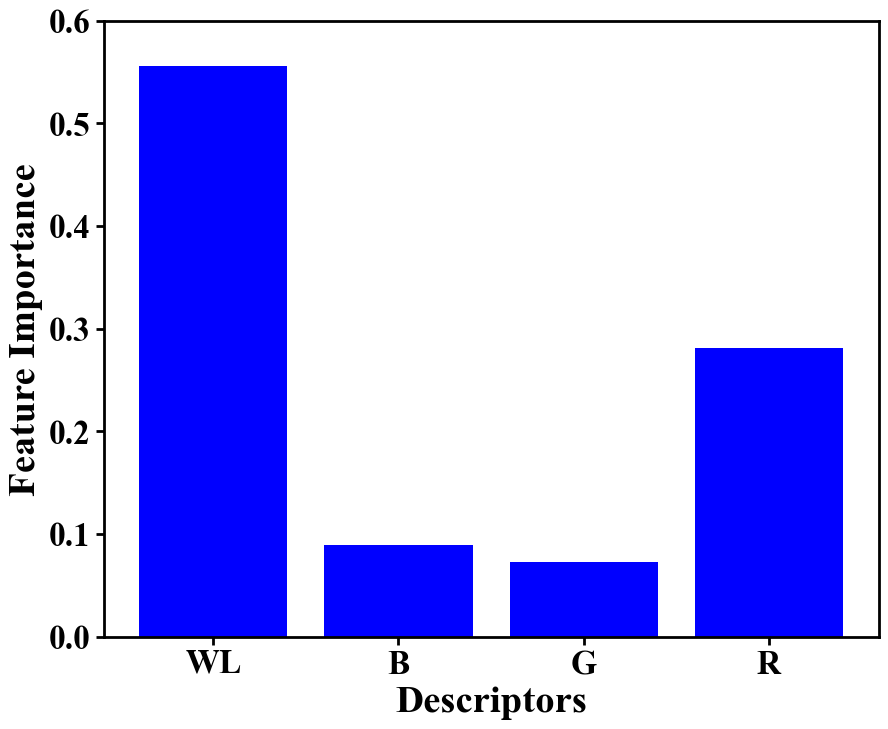

In [16]:
importance = RFR.feature_importances_
y = importance
x = ['$\mathregular{WL}$','$\mathregular{B}$','$\mathregular{G}$','$\mathregular{R}$']
plt.figure(figsize=(10,8))

plt.yticks(fontproperties = 'Times New Roman', size = 24, weight='black')
plt.xticks(fontproperties = 'Times New Roman', size = 24, weight='black')

ax = plt.gca() # gca = 'get current axis' 
ax.spines['bottom'].set_linewidth(2.0)
ax.spines['left'].set_linewidth(2.0)
ax.spines['top'].set_linewidth(2.0)
ax.spines['right'].set_linewidth(2.0)

plt.tick_params(axis='y',width=2,length=6)
plt.tick_params(axis='x',width=2,length=6)

plt.xlabel('Descriptors',fontdict={'family':'Times New Roman','weight':'black','size':28})
plt.ylabel('Feature Importance',fontdict={'family':'Times New Roman','weight':'black','size':28})

plt.ylim(0, 0.6)

plt.bar(x, y, color='blue')

plt.savefig('feature_importance.png', dpi=1000)
plt.show()